In [1]:
import os 
import zipfile

In [2]:
zip = "data.zip"
zip_ref = zipfile.ZipFile(zip,"r")
zip_ref.extractall('/data')
zip_ref.close()

zip = "validation.zip"
zip_ref = zipfile.ZipFile(zip,"r")
zip_ref.extractall("/val")
zip_ref.close()

In [6]:
import tensorflow as tf
import keras_preprocessing 
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINIG_DIR = "/data/data"
training_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 20, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2 , zoom_range = 0.2 , horizontal_flip = True )
VALIDATION_DIR = "/val/validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
train_generator = training_datagen.flow_from_directory ( TRAINIG_DIR, target_size = (224,224), class_mode = 'categorical', batch_size = 16 , shuffle= True)

Found 883 images belonging to 3 classes.


In [12]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissor': 2}

In [13]:
val_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, target_size = (224,224))

Found 101 images belonging to 3 classes.


In [61]:
model_1 = tf.keras.models.Sequential([
                                     
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128 , (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation= 'softmax' )
])

In [56]:
adam = tf.keras.optimizers.Adam(learning_rate= 0.0001)

In [63]:
model_1.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['acc'])

In [64]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("a.h5", monitor= 'val_acc', verbose = 1, save_best_only= True)

In [65]:
history_1 = model_1.fit(train_generator, epochs = 40 , steps_per_epoch=10,verbose = 1 , validation_steps = 1, validation_data= val_generator , callbacks = [checkpoint])

Epoch 1/40
10/10 [==============================] - 3s 279ms/step - loss: 1.1770 - acc: 0.3100 - val_loss: 1.0513 - val_acc: 0.5312

Epoch 00001: val_acc improved from -inf to 0.53125, saving model to a.h5
Epoch 2/40
10/10 [==============================] - 3s 262ms/step - loss: 1.0952 - acc: 0.4000 - val_loss: 1.0435 - val_acc: 0.3750

Epoch 00002: val_acc did not improve from 0.53125
Epoch 3/40
10/10 [==============================] - 3s 253ms/step - loss: 1.0711 - acc: 0.3992 - val_loss: 0.9601 - val_acc: 0.7500

Epoch 00003: val_acc improved from 0.53125 to 0.75000, saving model to a.h5
Epoch 4/40
10/10 [==============================] - 3s 254ms/step - loss: 1.0228 - acc: 0.4724 - val_loss: 0.8581 - val_acc: 0.6562

Epoch 00004: val_acc did not improve from 0.75000
Epoch 5/40
10/10 [==============================] - 3s 249ms/step - loss: 0.9531 - acc: 0.5708 - val_loss: 0.7295 - val_acc: 0.6250

Epoch 00005: val_acc did not improve from 0.75000
Epoch 6/40
10/10 [==================

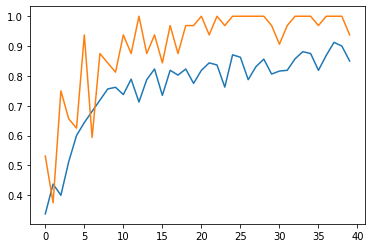

In [68]:
import matplotlib.pyplot as plt
plt.plot(history_1.history['acc'])
plt.plot(history_1.history['val_acc'])
plt.show()

In [ ]:
model_1 = tf.keras.models.load_model("a.h5")

In [76]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 86528)            